# Plotting Utils

In [1]:
import torch

import sys,os
sys.path.append("..")

from src.models import Critic, Critic_sort
from src.utils import motion_samples, get_borders
from src.map_benchmark import MixToOneBenchmark, Celeba64Benchmark 
from src.plotters import plot_teaser, plot_rays, PCA_plot_q_p_samples, plot_surfaces, plot_images

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

## 1. Plot 2D surfaces and rays

In [2]:
DIM = 2
WIDTH = 4
HIDDEN_DIMS  = [DIM,max(2*DIM,128),max(2*DIM,128),1] # to load models with these params

GPU_DEVICE = 1
assert torch.cuda.is_available()
torch.cuda.set_device(GPU_DEVICE)

In [3]:
benchmark =  MixToOneBenchmark(dim=DIM, width=WIDTH)

benchmark pair loaded


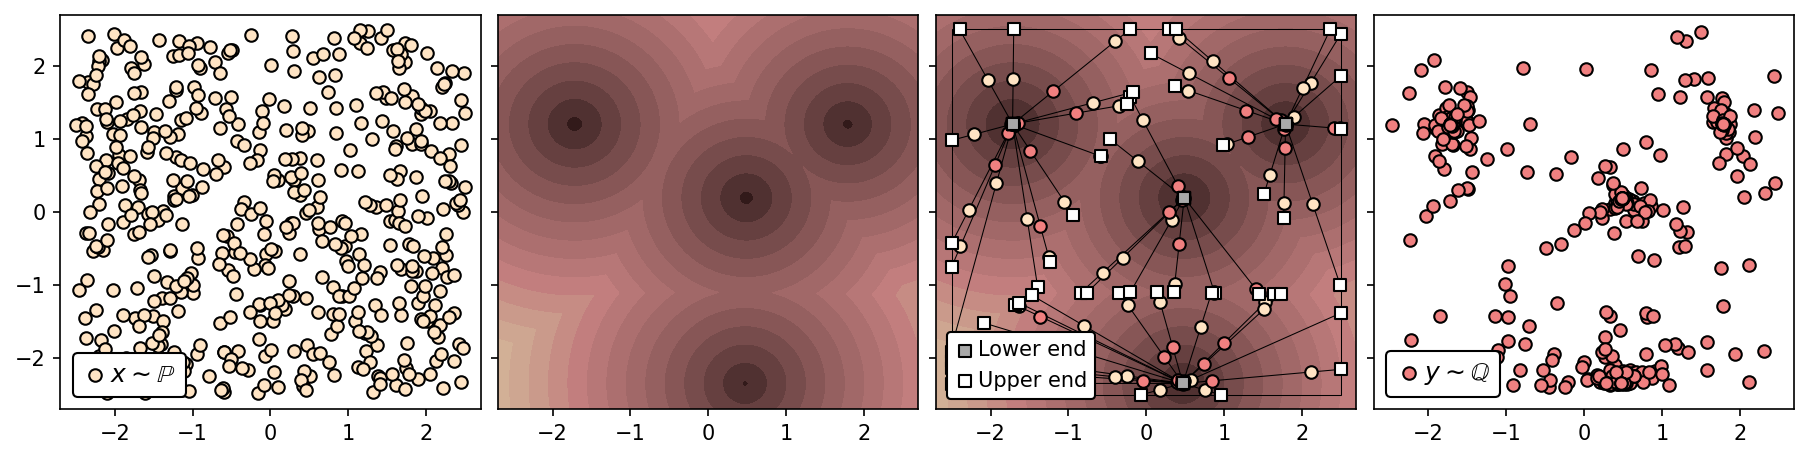

In [4]:
fig, axes = plot_teaser(
    benchmark, batch_size = 500,
    path = "../pics/nd/plot_teaser.png", fix = 12, fiy = 3
)

## 2. WGANs surface

In [5]:
method = {}
for key in  ['wgan','wgan-gp','wgan-lp','sn-gan','sort-out','lsot-f','wgan-qp','cowgan','3p-wgan','3p-wgan_rev']:
   
    if key == 'wgan':
        method[key] = Critic(HIDDEN_DIMS,"WGAN",0.1, None)
    elif key == 'sn-gan':
        method[key] = Critic(HIDDEN_DIMS,"SN-GAN", None, 2)
    elif key == 'sort-out':
        method[key] = Critic_sort(HIDDEN_DIMS, 1)
    else:
        method[key] = Critic(HIDDEN_DIMS,"W",None, None)
    method[key].load_state_dict(torch.load("../checkpoints/nd/dim_2/width_{}/method_{}.pt".format(WIDTH,key)))

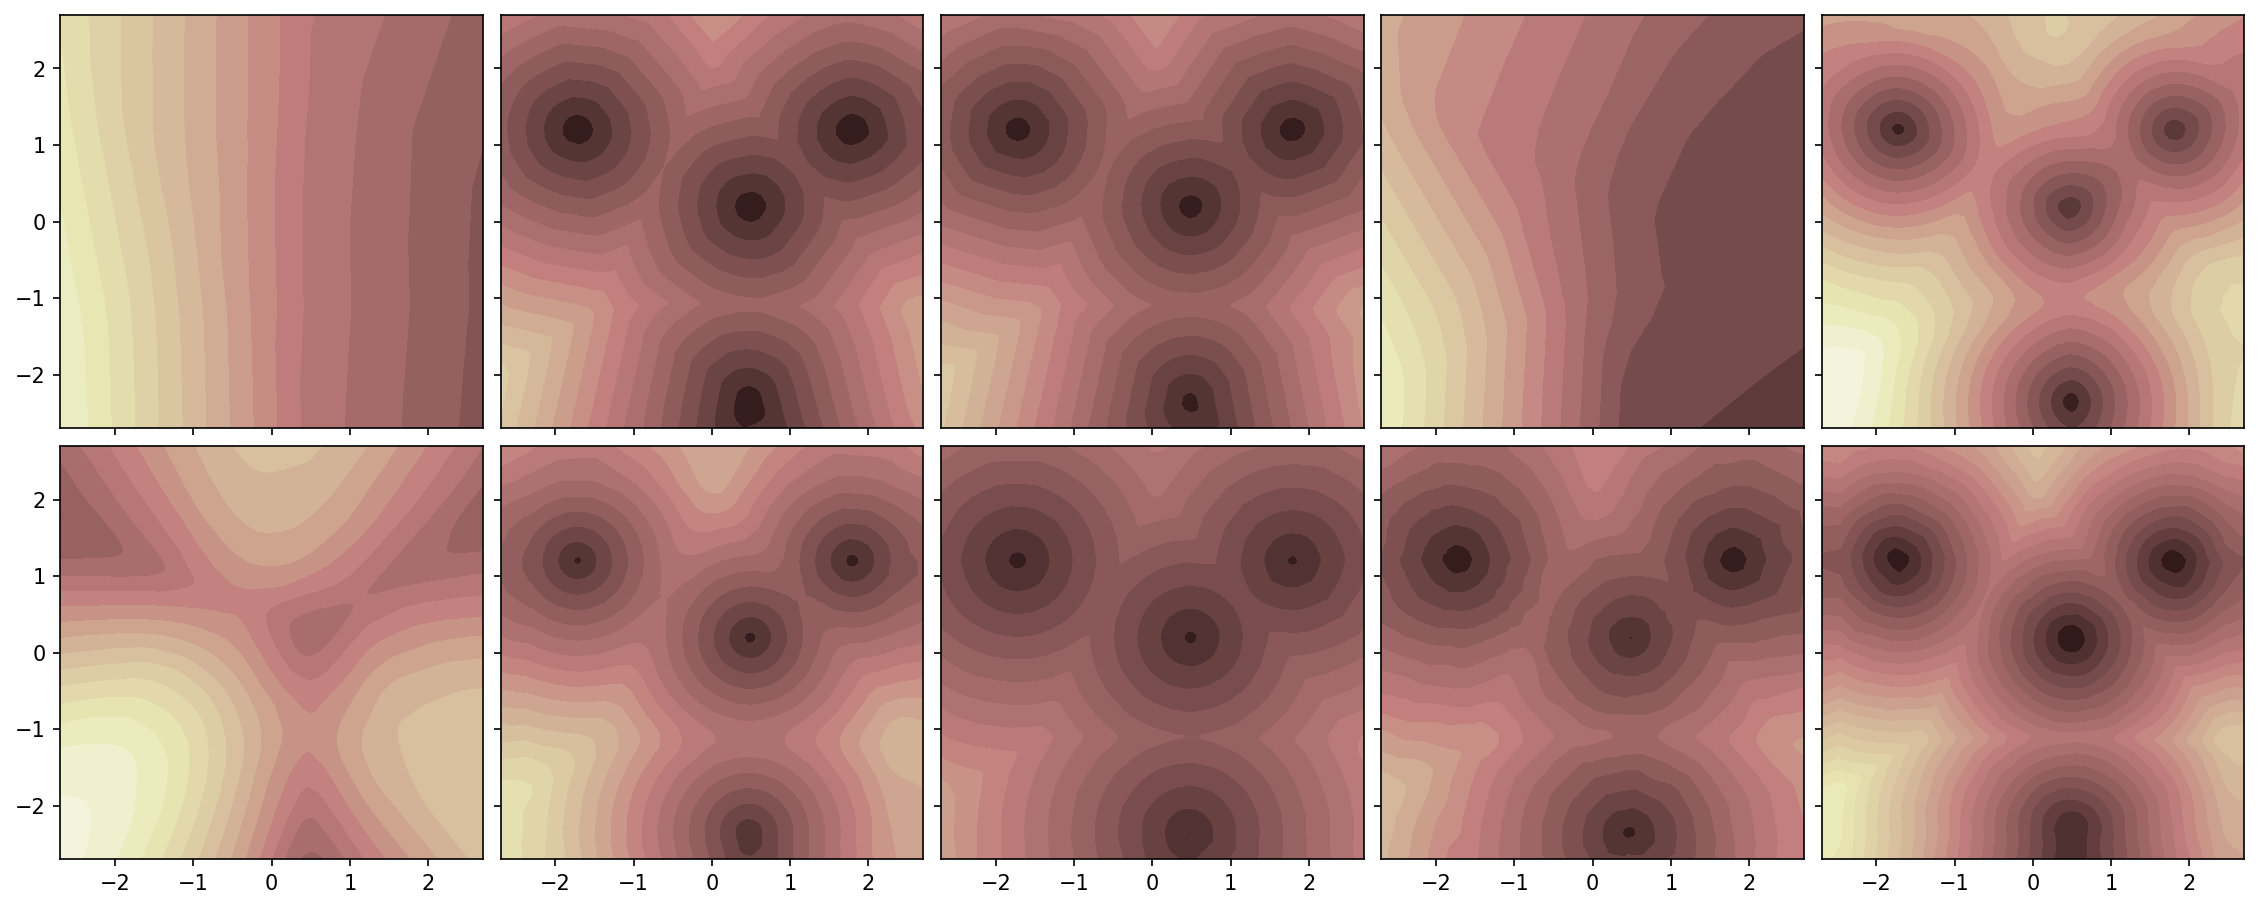

In [6]:
fig,axes = plot_surfaces(benchmark, method, "../pics/nd/plot_surfaces.png", 15, 6)

## 3. Plot ND PCA

In [7]:
DIM = 8
WIDTH = 16
benchmark =  MixToOneBenchmark(dim=DIM, width=WIDTH)

benchmark pair loaded


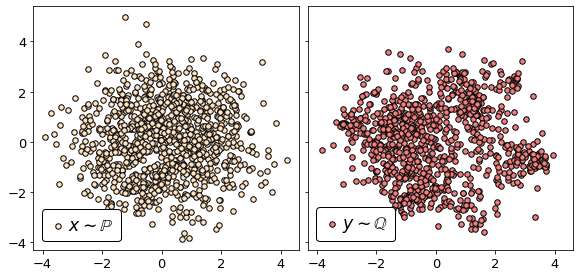

In [8]:
fig,axes = PCA_plot_q_p_samples(benchmark,  1000, 8,3.8, "../pics/nd/pca_{}d_{}".format(DIM,WIDTH), flag_p=False)

## 4. plot rays

In [9]:
DIM = 2
WIDTH = 16
 
benchmark =  MixToOneBenchmark(dim = DIM, width = WIDTH)

benchmark pair loaded


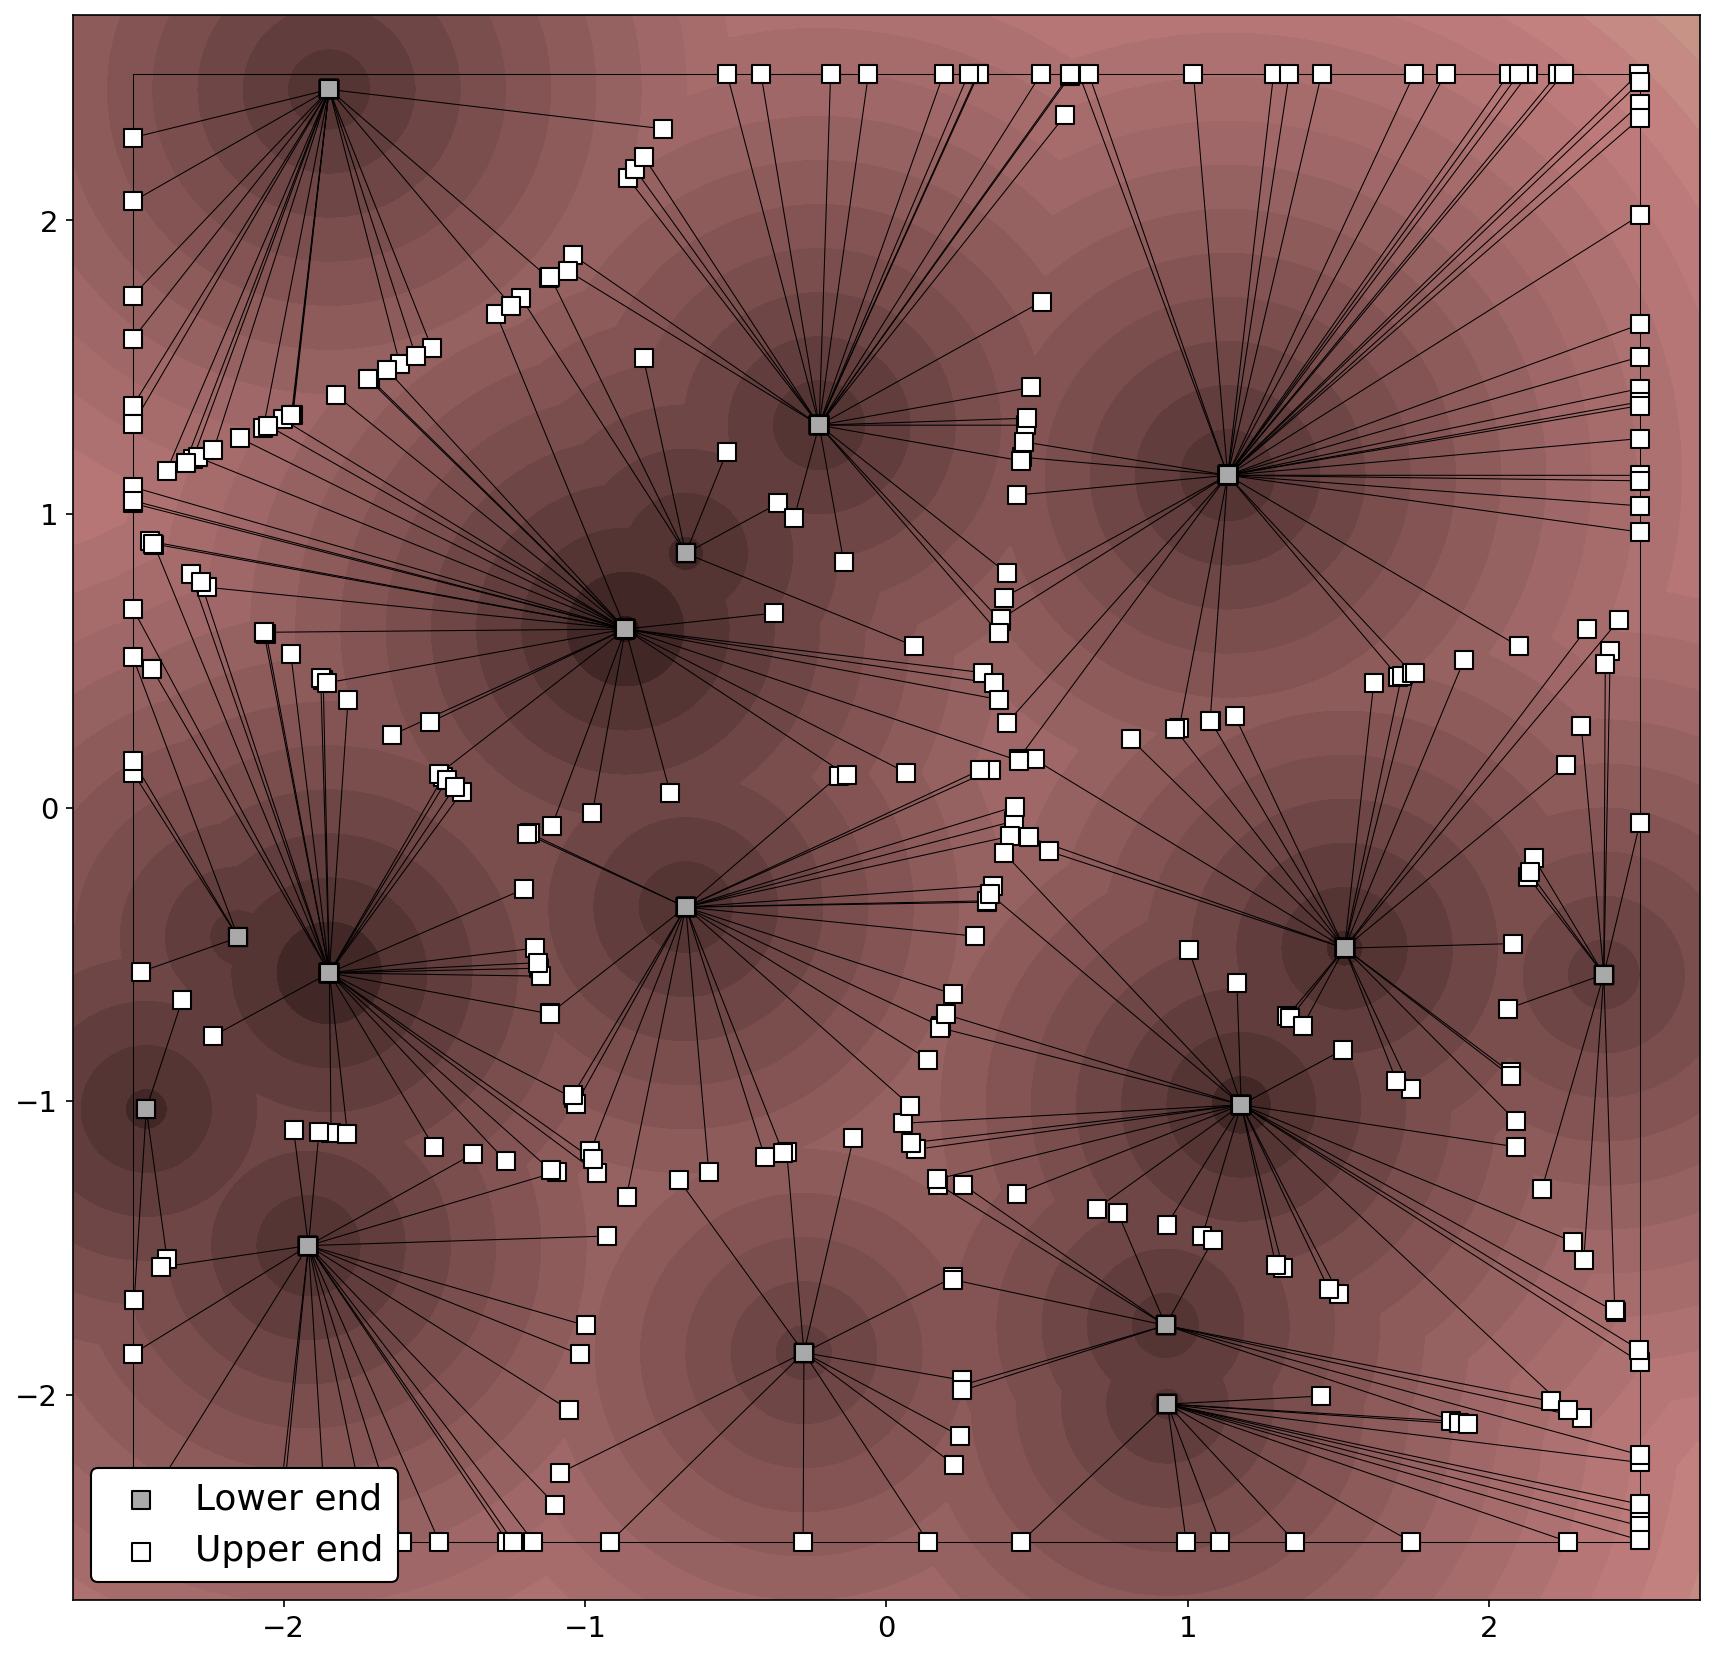

In [10]:
fig, axes = plot_rays(benchmark, 300, "../pics/nd/plot_rays.png")

### 5. Celeba faces and PCA

In [11]:
DEG = 100
WIDTH = 16
# or DEG = 10; WIDTH = 1

In [12]:
SEMI_LENGTH_SQUARE = 1.2
DIM = 3*64*64

In [13]:
benchmark = Celeba64Benchmark(width=WIDTH, deg=DEG)

Benchmark pair loaded


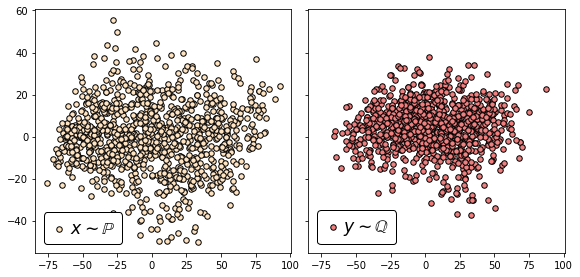

In [14]:
torch.manual_seed(153);np.random.seed(153)
fig,axes = PCA_plot_q_p_samples(benchmark,  1000, 8,3.8, "../pics/celeba/pca_celeba_{}".format(WIDTH), flag_p=True)

In [15]:
torch.manual_seed(153);np.random.seed(153)

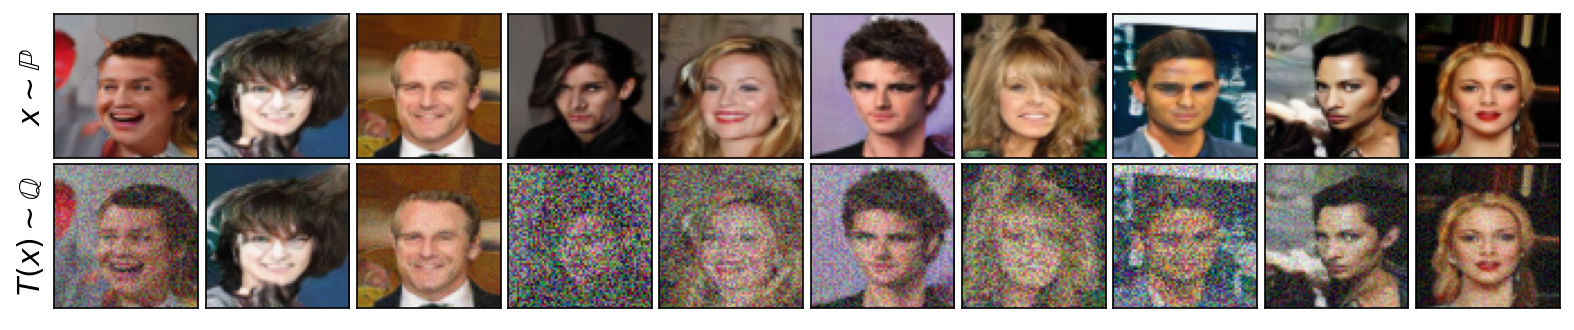

In [16]:
plot_images( benchmark, 10, shape=(3, 64, 64), path = "../pics/celeba/celeba_faces_{}".format(WIDTH));